In [1]:
#Importing Packages
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
#Defining ODE 
def func(FM,t,a,A_e,A_p,b,f,g,j,k,K_m,S_e,v_m,V,W,y,z):
    P,P_b,P_u,E,E_b,E_u,S = FM
    dPdt = y/S - (k*S_e + (k/W)*S)*P + j*P_b + f*(A_e/A_p)*E
    dP_bdt = (k*S_e + (k/W)*S)*P - j*P_b - a*P_b
    dP_udt = a*P_b - g*(A_p/A_e)*P_u
    dEdt = b*E_u + j*E_b - (k/W)*S*E - f*(A_e/A_p)*E
    dE_bdt = (k/W)*S*E - j*E_b - a*E_b
    dE_udt = g*(A_p/A_e)*P_u + a*E_b - b*E_u - z*E_u
    dSdt = -(k/W)*S*((A_p/V)*P+(A_e/V)*E) + (j+a)*((A_p/V)*P_b+(A_e/V)*E_b) - (v_m*S)/(V*(K_m+S))
    dydt = [dPdt, dP_bdt, dP_udt, dEdt, dE_bdt, dE_udt, dSdt]
    return dydt

In [3]:
#Defining Variables
A_e = 47
A_p = 314
a = 1
b = 1
f = .1
g = .1
j = 10**2
K_m = 2.5
K_d = .74
k = j/K_d
y = .000083
x = .002
W = 32
v_m = 8.8 * 10**3
V = 523
z = .002

y = y/4

In [8]:
#Defining the different rates
S_e1 = 0.1
S_e2 = 0.01
S_e3 = 0.1

2.042295419165042


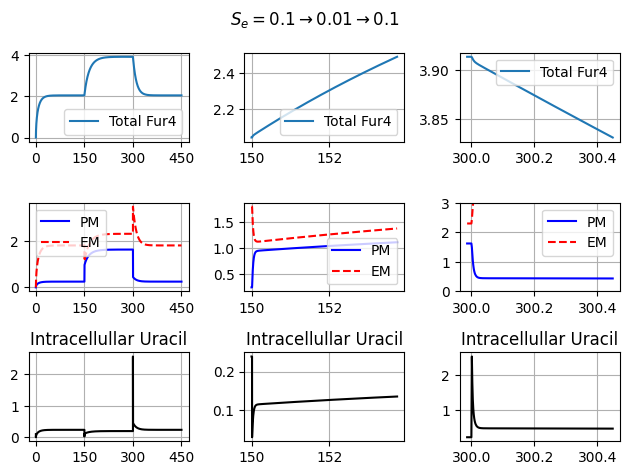

In [9]:
#Running the ODE
num = 100000

#Defining Initial Condition, Timespan, and rates to test
y0 = [0,0,0,0,0,0,0.1]
t1 = np.linspace(0,150000,num)
#Finding solution to ODE
sol1 = odeint(func,y0,t1,args = (a,A_e,A_p,b,f,g,j,k,K_m,S_e1,v_m,V,W,y,z))

#Defining Initial Condition, Timespan, and rates to test
y0 = sol1[-1,:]
t2 = np.linspace(0,150000,num)
#Finding solution to ODE
sol2 = odeint(func,y0,t2,args = (a,A_e,A_p,b,f,g,j,k,K_m,S_e2,v_m,V,W,y,z))

#Defining Initial Condition, Timespan, and rates to test
y0 = sol2[-1,:]
t3 = np.linspace(0,150000,num)
#Finding solution to ODE
sol3 = odeint(func,y0,t3,args = (a,A_e,A_p,b,f,g,j,k,K_m,S_e3,v_m,V,W,y,z))

sol = np.vstack([sol1,sol2,sol3])
t = np.hstack([t1,t2+150000,t3+300000]) * 10**(-3)

print(sum(sol[-1,i] for i in range(6)))



#Plotting solution
fig,ax = plt.subplots(3,3)
ax[0]

combined = sol[:,:6]
ax[0][0].plot(t,np.sum(combined,axis = 1),label = "Total Fur4")
# ax[0][0].set_title("Total Fur4")
ax[0][0].set_xticks(np.array([0,150,300,450]))
ax[0][0].grid()
ax[0][0].legend()

ax[1][0].plot(t,sol[:,0]+sol[:,1]+sol[:,2],'b',label = "PM")
ax[1][0].plot(t,sol[:,3]+sol[:,4]+sol[:,5],'r--',label = "EM")
# plt1.set(xlim=(199990,200010),ylim=(0,.1),)
# plt.legend()
ax[1][0].grid()
# ax[1][0].set_title(f"S_e = 0.5 -> 0.01 -> {S_e}")
ax[1][0].set_xticks(np.array([0,150,300,450]))
ax[1][0].legend()


ax[2][0].plot(t,sol[:,6],'k')
# ax[2][0].set_title("Intracellullar Uracil")
#Setting graph layout
ax[2][0].grid()
ax[2][0].set_xticks(np.array([0,150,300,450]))
ax[2][0].set_title("Intracellullar Uracil")
ax[2][0].set(ylim=(0.15,.25))

#Plotting solution
arg1=len(t)//3-10
arg2=len(t)//3+2500

ax[0][1].plot(t[arg1:arg2],np.sum(combined,axis=1)[arg1:arg2],label = "Total Fur4")
ax[0][1].grid()
ax[0][1].legend()

ax[1][1].plot(t[arg1:arg2],sol[arg1:arg2,0]+sol[arg1:arg2,1]+sol[arg1:arg2,2],'b',label = "PM")
ax[1][1].plot(t[arg1:arg2],sol[arg1:arg2,3]+sol[arg1:arg2,4]+sol[arg1:arg2,5],'r--',label = "EM")
ax[1][1].grid()
ax[1][1].legend()
# ax[1][1].set(ylim=(0,.1))


ax[2][1].plot(t[arg1:arg2],sol[arg1:arg2,6],'k')
#Setting graph layout
ax[2][1].grid()
ax[2][1].set_title("Intracellullar Uracil")

#Plotting solution
arg1=2*len(t)//3-10
arg2=2*len(t)//3+300

ax[0][2].plot(t[arg1:arg2],np.sum(combined,axis=1)[arg1:arg2],label = "Total Fur4")
ax[0][2].grid()
ax[0][2].legend()

ax[1][2].plot(t[arg1:arg2],sol[arg1:arg2,0]+sol[arg1:arg2,1]+sol[arg1:arg2,2],'b',label = "PM")
ax[1][2].plot(t[arg1:arg2],sol[arg1:arg2,3]+sol[arg1:arg2,4]+sol[arg1:arg2,5],'r--',label = "EM")
ax[1][2].grid()
ax[1][2].legend()
ax[1][2].set(ylim=(0,3))


ax[2][2].plot(t[arg1:arg2],sol[arg1:arg2,6],'k')
#Setting graph layout
ax[2][2].grid()
ax[2][2].set_title("Intracellullar Uracil")
plt.suptitle(fr"$S_e = {S_e1} \rightarrow {S_e2} \rightarrow {S_e3}$")

plt.tight_layout()
plt.show()

2.0470100090489542


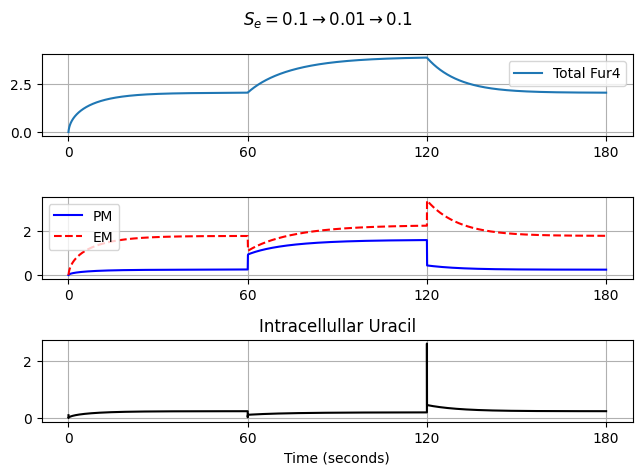

In [22]:
#Running the ODE
num = 100000

timespan = 60*1e3

#Defining Initial Condition, Timespan, and rates to test
y0 = [0,0,0,0,0,0,0.1]
t1 = np.linspace(0,timespan,num)
#Finding solution to ODE
sol1 = odeint(func,y0,t1,args = (a,A_e,A_p,b,f,g,j,k,K_m,S_e1,v_m,V,W,y,z))

#Defining Initial Condition, Timespan, and rates to test
y0 = sol1[-1,:]
t2 = np.linspace(0,timespan,num)
#Finding solution to ODE
sol2 = odeint(func,y0,t2,args = (a,A_e,A_p,b,f,g,j,k,K_m,S_e2,v_m,V,W,y,z))

#Defining Initial Condition, Timespan, and rates to test
y0 = sol2[-1,:]
t3 = np.linspace(0,timespan,num)
#Finding solution to ODE
sol3 = odeint(func,y0,t3,args = (a,A_e,A_p,b,f,g,j,k,K_m,S_e3,v_m,V,W,y,z))

sol = np.vstack([sol1,sol2,sol3])
t = np.hstack([t1,t2+timespan,t3+2*timespan]) * 10**(-3)

print(sum(sol[-1,i] for i in range(6)))



#Plotting solution
fig,ax = plt.subplots(3,1)
ax[0]

time_ticks = np.array([0, timespan, 2*timespan, 3*timespan])*1e-3

combined = sol[:,:6]
ax[0].plot(t,np.sum(combined,axis = 1),label = "Total Fur4")
# ax[0][0].set_title("Total Fur4")
ax[0].set_xticks(time_ticks)
ax[0].grid()
ax[0].legend()

ax[1].plot(t,sol[:,0]+sol[:,1]+sol[:,2],'b',label = "PM")
ax[1].plot(t,sol[:,3]+sol[:,4]+sol[:,5],'r--',label = "EM")
# plt1.set(xlim=(199990,200010),ylim=(0,.1),)
# plt.legend()
ax[1].grid()
# ax[1][0].set_title(f"S_e = 0.5 -> 0.01 -> {S_e}")
ax[1].set_xticks(time_ticks)
ax[1].legend()


ax[2].plot(t,sol[:,6],'k')
# ax[2][0].set_title("Intracellullar Uracil")
#Setting graph layout
ax[2].grid()
ax[2].set_xticks(time_ticks)
ax[2].set_xlabel("Time (seconds)")
ax[2].set_title("Intracellullar Uracil")


plt.suptitle(fr"$S_e = {S_e1} \rightarrow {S_e2} \rightarrow {S_e3}$")

plt.tight_layout()
plt.show()